# Coursework – Data Analysis

## Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Settings for seaborn

In [5]:
sns.set_theme(style='darkgrid')

### Task 1

### A)

This is a csv file but used a semi-colon delimiter

In [6]:
df_white = pd.read_csv("winequality-white.csv", delimiter=';')

### B)

To get the count of each quality class label

we created a column and set it to 1

In [7]:
df_white['count'] = 1

Then we used .groupby method to group the data according to the "quality" column then added the "count" column under each class label

In [8]:
df_white.groupby("quality",as_index=False)['count'].sum()

,quality,count
0,3,20
1,4,163
2,5,1457
3,6,2198
4,7,880
5,8,175
6,9,5


We deleted the "count" column because its not useful anymore

In [9]:
del df_white['count']

### C)

We used the shuffle function to shuffle the white wine dataset and saved it under a new variable white_wine

In [26]:
white_wine = shuffle(df_white, random_state=1)

### D)

To check the columns names

In [11]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Scatterplot (Visualization) of fixed acidity vs pH of white wines in the dataset

First line sets the size of the figure, second line plots the graph according to the provided data

<AxesSubplot:xlabel='pH', ylabel='fixed acidity'>

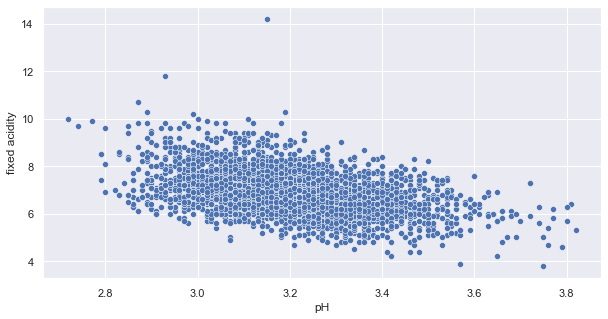

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='pH', y='fixed acidity',data=white_wine)

### Task 2

### A)

To take a look at the data columns

In [13]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Dividing the data into features and label with the column names

In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']

Selecting the needed data and converted to a numpy array

In [15]:
X = white_wine[features].values
Y = white_wine[target].values

initializing PCA with the number of components specified

In [16]:
pca = PCA(n_components=2)

Fitting and transforming the data

In [17]:
PCAS = pca.fit_transform(X)

Creating a new dataframe to store the result of the PCA and stating the columns names

In [18]:
df_pca = pd.DataFrame(data=PCAS, columns=['PC1','PC2'])

In [19]:
df_pca

,PC1,PC2
0,52.741645,-21.918934
1,72.540003,-2.440255
2,9.720112,3.200800
3,29.001289,1.139489
4,-22.615624,9.949946
...,...,...
4893,35.923488,-25.772756
4894,-27.124049,-25.190757
4895,-43.131472,-15.644885
4896,1.922403,19.008316


### B)

joining the class/label variable to the PCA output

In [20]:
final_pca = pd.concat([df_pca,df_white[target]],axis=1)

- Setting the style of the visualization
- Setting the size of the figure
- adding a subplot to the visualization
- setting the name of the x and y axis
- setting the title of the visualization

- creates a list of the unique elements of the class label column
- creates a list of differnt colors with the same size as the list above
- The for loop plots the graph
- adding the legend
- setting a grid for our fraph

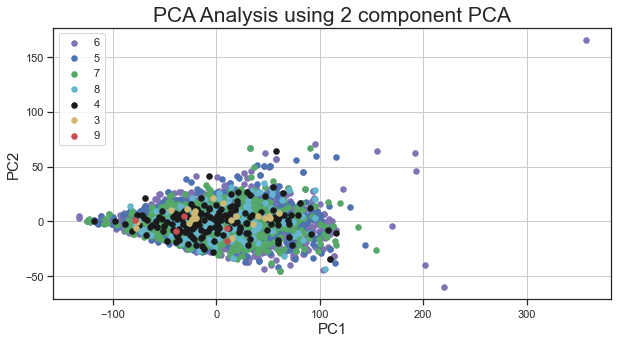

In [21]:
sns.set(style="ticks")
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('PCA Analysis using 2 component PCA', fontsize=21)

targets = list(final_pca['quality'].unique())
colors = ['m','b','g','c','k','y','r']
for target, color in zip(targets, colors):
    indicesToKeep = final_pca['quality'] == target
    ax.scatter(final_pca.loc[indicesToKeep,'PC1'], final_pca.loc[indicesToKeep,'PC2'], c = color, s = 30)
    
ax.legend(targets)
ax.grid()

### C)

PCA variance calculation

In [22]:
pca.explained_variance_ratio_

array([0.90965734, 0.07933386])

calculation of the lost variance

In [23]:
(1 - sum(list(pca.explained_variance_ratio_)))*100

1.100879290910084

1.1 percent of the variance was lost during the PCA 

### Task 3

### A)

Using Iloc for indexing to select the first 1000 rows

In [29]:
validation_set = white_wine.iloc[:1000,:]
validation_set.shape

(1000, 12)

### B)

Using Iloc for indexing to select the last 1000 rows

In [30]:
test_set = white_wine.iloc[3898:,:]
test_set.shape

(1000, 12)

### C)

Using Iloc for indexing to select the remaining rows

In [31]:
training_set = white_wine.iloc[1000:3898,:]
training_set.shape

(2898, 12)

class/ label count for error checking

In [32]:
validation_set['quality'].value_counts()

6    445
5    298
7    187
8     38
4     30
3      2
Name: quality, dtype: int64

In [33]:
training_set['quality'].value_counts()

6    1299
5     856
7     534
4      99
8      93
3      13
9       4
Name: quality, dtype: int64

In [34]:
test_set['quality'].value_counts()

6    454
5    303
7    159
8     44
4     34
3      5
9      1
Name: quality, dtype: int64

### Task 4

### A)

showing the shape to use it in calculating different training sizes 

In [35]:
training_set.shape

(2898, 12)

In [38]:
training_sizes = [int(0.1 * 2898), int(0.15 * 2898), int(0.2 * 2898), int(0.25 * 2898), int(0.3 * 2898),
               int(0.4 * 2898), int(0.5 * 2898), int(0.6 * 2898), int(0.7 * 2898), int(0.8 * 2898)]

In [43]:
train_sizes = training_sizes

#### Scaling the data

Intializing the scaler

In [46]:
stdScaler_x = StandardScaler()
#stdScaler_y = StandardScaler()

In [48]:
X_scaled = stdScaler_x.fit_transform(training_set[features])
#y_scaled = stdScaler_y.fit_transform(training_set['quality'].values.reshape(-1,1))

In [60]:
training_scores = []
validation_scores = []

for i in training_sizes:
    t1 = training_set[:i]
    lr = LinearRegression()
    X_scaled = stdScaler_x.fit_transform(t1[features])
    validation_X_scaled = stdScaler_x.transform(validation_set[features])
    model = lr.fit(X_scaled, t1['quality'])
    train_score = mean_squared_error(t1['quality'], model.predict(X_scaled))
    training_scores.append(train_score)
    validation_score = mean_squared_error(validation_set['quality'], model.predict(validation_X_scaled))
    validation_scores.append(validation_score)

In [61]:
training_scores

[0.4450317044065159,
 0.5097847956706707,
 0.5192610738540813,
 0.5360479628744074,
 0.5490480618248983,
 0.547061703010613,
 0.5510165227141157,
 0.5535971123586098,
 0.558381492312281,
 0.5708831911329958]

In [67]:
validation_scores

[0.5597976477972822,
 0.5576108034951709,
 0.5555576917603752,
 0.5511078616011257,
 0.5463016712810327,
 0.5424881938985523,
 0.5438897008809672,
 0.5439033502842183,
 0.5446897393467971,
 0.5460897417138649]

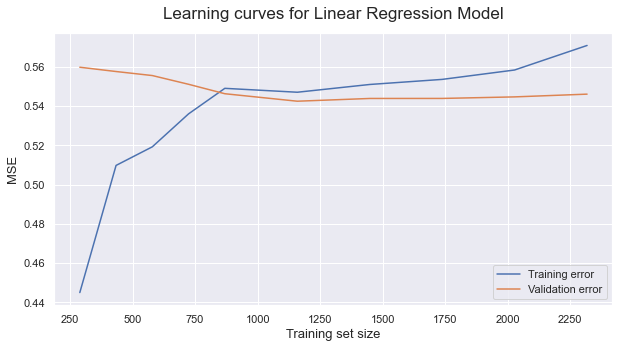

In [68]:
sns.set_theme(style='darkgrid')
plt.plot(train_sizes, training_scores, label='Training error')
plt.plot(train_sizes, validation_scores, label='Validation error')
plt.ylabel('MSE', fontsize=13)
plt.xlabel('Training set size', fontsize=13)
plt.title('Learning curves for Linear Regression Model', fontsize=17, y=1.03)
plt.legend()
plt.show()

### B)

In [70]:
int(2898 *0.4)

1159

The best training size is 1159 because it has the lowest validation error

### C)

Initialize LinearRegression 

In [72]:
lr = LinearRegression()

selecting the best dataset

In [73]:
best_train_set = training_set[:1159]

scaling the input

In [74]:
stdScaler_x1 = StandardScaler()

In [75]:
X_scaled = stdScaler_x1.fit_transform(best_train_set[features])

In [76]:
X_test_scaled = stdScaler_x1.transform(test_set[features])

Fitting the linear Regression model

In [77]:
model = lr.fit(X_scaled, best_train_set['quality'])

MSE = MEAN SQUARED ERROR

Calculating the test_set MSE error 

In [78]:
mean_squared_error(test_set['quality'], model.predict(X_test_scaled))

0.5970876698418675

In [79]:
0.5424881938985523

0.5424881938985523

The MSE of the test data was 0.597


According to our Learning curve, the test data MSE was bad because the highest value on the graph was 0.57 and the test data MSE was 0.597

### Task 5

### A)

#### Task 1

- wines with qualities 5 and 6 had the highest occurences
- wines with quality 9 were the fewest
- Based on the graph, pH and fixed acidity had a little corelation

#### Task 2

- After a 2 component PCA analysis, 1.1% of the variance was lost

#### Task 3

No wine with quality 9 was in the validation set. Hence, the distribution is not balanced

#### Task 4

The learning curve had high bias and low variance.

The test data had a bad error when compared to the learning curve

### B)

- The dataset used are not balanced

To attain an ideal learning curve, we aim to reduce the variance and bias. The trade-off between bias and variance makes it difficult to reduce both. In this case, we have a high bias (if we say, the MSE values are high) and low variance problem.


The solution to handle this issue is to 
 - balance the dataset, 
 - reduce regularization, 
 - use more complex learning algorithms 
 - increase the columns used (increase the features).